Material complementar ao [artigo disponível no site Ciência Programada](https://cienciaprogramada.com.br/2020/09/digitalizando-graficos-engauge-digitizer-python/).

Primeiro, vamos importar as bibliotecas que utilizaremos:

In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

A função de cada biblioteca será mostrada no decorrer do arquivo.

Vamos salvar o caminho para o arquivo com os dados em uma variável. Isso facilita a modificação do código caso esse arquivo depois seja movido para uma outra pasta:

In [2]:
arquivo_dados = 'dados_combustivel.csv'

O `numpy` possui o método `genfromtxt` que permite extrair dados de arquivos de texto. O parâmetro `delimiter` permite especificar o delimitador utilizado no arquivo que, no caso, é vírgula por ser formato csv; o parâmetro `names` permite informar os nomes para as colunas de dados. O valor `True` significa que é para utilizar a linha logo acima dos dados numéricos do arquivo de origem:

In [3]:
dados = np.genfromtxt(arquivo_dados, delimiter=',', names=True)

Podemos visualizar as colunas disponíveis. Cada conjunto de dados pode ser obtido da variável a partir do nome da coluna com a sintaxe `dados[nome_da_coluna]`:

In [4]:
dados.dtype.names

('x', 'JP5', 'JetA', 'JP7', 'JetB', 'AvGas')

O Engauge Digitizer exportou pontos do nosso gráfico de origem. Podemos então plotar um primeiro rascunho de gráfico com cada conjunto de pontos usando o método `scatter` do Matplotlib para ter uma ideia do comportamento geral dos dados:

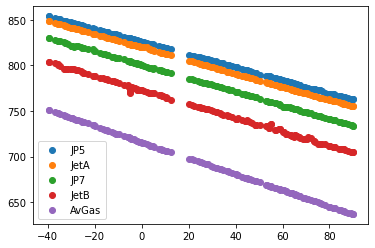

In [5]:
for name in dados.dtype.names[1:]:
    plt.scatter(dados['x'], dados[name], label=name)
plt.legend()
plt.show()

É bastante perceptível que cada conjunto de dados possui comportamento linear. Aqui entra em cena o método `linregress` importado da biblioteca SciPy.

Vamos dar uma olhada, por exemplo, nos dados de regressão linear do conjunto de dados referente ao combustível `JetA`:

In [6]:
linregress(dados['x'], dados['JetA'])

LinregressResult(slope=-0.7221033469533403, intercept=819.8747195466843, rvalue=-0.9999442604546929, pvalue=0.0, stderr=0.0005972008546052884)

Repare que o método retorna cinco valores que descrevem a regressão: inclinação da reta, intercepto, o valor de R (coeficiente de correlação), o valor de P e o desvio padrão. Uma descrição pormenorizada do significado de cada parâmetro pode ser obtida [na documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). Aqui para nós, o que interessa é verificar que o valor de R, ou mais especificamente o quadrado de R, fique o mais próximo de 1 e que o desvio padrão seja baixo para que realmente possamos considerar que os dados possuem um comportamento linear.

Vamos verificar para cada conjunto de dados com um *loop*:

In [7]:
for name in dados.dtype.names[1:]:
    regressao = linregress(dados['x'], dados[name])
    print(f"Regressão para {name}: R^2={regressao.rvalue**2:.4f} e stderr={regressao.stderr:.4f}")

Regressão para JP5: R^2=0.9998 e stderr=0.0007
Regressão para JetA: R^2=0.9999 e stderr=0.0006
Regressão para JP7: R^2=0.9998 e stderr=0.0008
Regressão para JetB: R^2=0.9981 e stderr=0.0026
Regressão para AvGas: R^2=0.9999 e stderr=0.0007


Logo, podemos ver que considerar cada conjunto linear é bastante razoável.

Podemos, então, plotar a reta resultante da regressão de cada conjunto e gerar nosso gráfico final. Vamos utilizar um dos estilos de gráfico pré-definidos no Matplotlib, [que podem ser vistos aqui](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html). E também colocar títulos nos eixos e no gráfico:

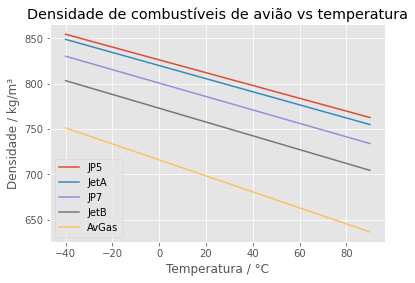

In [8]:
# faixa de valores de temperatura do gráfico
temperatura = np.arange(-40, 100, 10)

plt.style.use('ggplot')

for name in dados.dtype.names[1:]:
    regressao = linregress(dados['x'], dados[name])
    plt.plot(temperatura, regressao.slope * temperatura + regressao.intercept, label=name)
    plt.legend()
    
plt.xlabel('Temperatura / °C')
plt.ylabel('Densidade / kg/m³')
plt.title('Densidade de combustíveis de avião vs temperatura')
plt.show()

É um gráfico muito mais apresentável que o original, concorda? E muitas outras personalizações podem ser feitas a critério do usuário. Abaixo segue um gráfico mais elaborado, utilizando mais alguns recursos do Matplotlib:

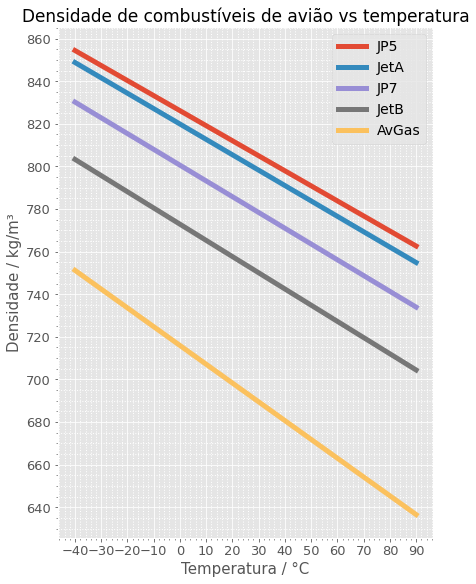

In [9]:
# mudando a frequência de ticks (marcações) nos eixos
import matplotlib.ticker as plticker
ticks_densidade = plticker.MultipleLocator(base=20)
ticks_temperatura = plticker.MultipleLocator(base=10)

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6, 8), constrained_layout=True)

for name in dados.dtype.names[1:]:
    regressao = linregress(dados['x'], dados[name])
    ax.plot(temperatura, regressao.slope * temperatura + regressao.intercept, 
            label=name, linewidth=5)
    ax.legend(fontsize=14)
    
ax.xaxis.set_major_locator(ticks_temperatura)
ax.yaxis.set_major_locator(ticks_densidade)
ax.tick_params(labelsize=13)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth='1.0', color='white')

ax.set_xlabel('Temperatura / °C', fontsize=15)
ax.set_ylabel('Densidade / kg/m³', fontsize=15)
ax.set_title('Densidade de combustíveis de avião vs temperatura', fontsize=17)

plt.show()